<a href="https://colab.research.google.com/github/codexvala-da/Clickstream-Data-Analysis/blob/main/DS_Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import necessary libraries

In [103]:
import pandas as pd
import numpy as np
import sklearn as sci
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Import dataset and map data values to redable format

In [104]:
# Load the dataset
e_shopping_data = pd.read_csv('/content/e-shop clothing 2008.csv', sep=';')

#Check for null values

In [105]:
e_shopping_data.isnull().sum()

,0
year,0
month,0
day,0
order,0
country,0
session ID,0
page 1 (main category),0
page 2 (clothing model),0
colour,0
location,0


#Mapping catagorical values to text

In [106]:
# Mapping for COUNTRY
country_mapping = {
    1: 'Australia', 2: 'Austria', 3: 'Belgium', 4: 'British Virgin Islands',
    5: 'Cayman Islands', 6: 'Christmas Island', 7: 'Croatia', 8: 'Cyprus',
    9: 'Czech Republic', 10: 'Denmark', 11: 'Estonia', 12: 'unidentified',
    13: 'Faroe Islands', 14: 'Finland', 15: 'France', 16: 'Germany',
    17: 'Greece', 18: 'Hungary', 19: 'Iceland', 20: 'India',
    21: 'Ireland', 22: 'Italy', 23: 'Latvia', 24: 'Lithuania',
    25: 'Luxembourg', 26: 'Mexico', 27: 'Netherlands', 28: 'Norway',
    29: 'Poland', 30: 'Portugal', 31: 'Romania', 32: 'Russia',
    33: 'San Marino', 34: 'Slovakia', 35: 'Slovenia', 36: 'Spain',
    37: 'Sweden', 38: 'Switzerland', 39: 'Ukraine', 40: 'United Arab Emirates',
    41: 'United Kingdom', 42: 'USA', 43: 'biz (*.biz)', 44: 'com (*.com)',
    45: 'int (*.int)', 46: 'net (*.net)', 47: 'org (*.org)'
}

# Mapping for PAGE 1 (MAIN CATEGORY)
main_category_mapping = {
    1: 'trousers', 2: 'skirts', 3: 'blouses', 4: 'sale'
}

# Mapping for COLOUR
colour_mapping = {
    1: 'beige', 2: 'black', 3: 'blue', 4: 'brown', 5: 'burgundy', 6: 'gray',
    7: 'green', 8: 'navy blue', 9: 'of many colors', 10: 'olive', 11: 'pink',
    12: 'red', 13: 'violet', 14: 'white'
}

# Mapping for LOCATION
location_mapping = {
    1: 'top left', 2: 'top in the middle', 3: 'top right',
    4: 'bottom left', 5: 'bottom in the middle', 6: 'bottom right'
}

# Mapping for MODEL PHOTOGRAPHY
model_photography_mapping = {
    1: 'en face', 2: 'profile'
}

# Mapping for PRICE 2
price2_mapping = {
    1: 'yes', 2: 'no'
}

column_names_mapping = {
    'year': 'Year',
    'month': 'Month',
    'day': 'Day',
    'country': 'Country',
    'session ID': 'Session ID',
    'colour': 'Colour',
    'page 1 (main category)': 'Product category',
    'location': 'Page location',
    'price 2': 'Above average price',
    'page 2 (clothing model)': 'Clothing model',
    'model photography': 'Model photography',
    'price': 'Price',
    'page': 'Page',
    'order': 'Order'
}

# Apply the mappings to relevant columns
e_shopping_data['country'] = e_shopping_data['country'].map(country_mapping)
e_shopping_data['page 1 (main category)'] = e_shopping_data['page 1 (main category)'].map(main_category_mapping)
e_shopping_data['colour'] = e_shopping_data['colour'].map(colour_mapping)
e_shopping_data['location'] = e_shopping_data['location'].map(location_mapping)
e_shopping_data['model photography'] = e_shopping_data['model photography'].map(model_photography_mapping)
e_shopping_data['price 2'] = e_shopping_data['price 2'].map(price2_mapping)

#Update column names
e_shopping_data.rename(columns=column_names_mapping, inplace=True)

#Overview of data after pre-processing

In [107]:
e_shopping_data.head()

,Year,Month,Day,Order,Country,Session ID,Product category,Clothing model,Colour,Page location,Model photography,Price,Above average price,Page
0,2008,4,1,1,Poland,1,trousers,A13,beige,bottom in the middle,en face,28,no,1
1,2008,4,1,2,Poland,1,trousers,A16,beige,bottom right,en face,33,no,1
2,2008,4,1,3,Poland,1,skirts,B4,olive,top in the middle,en face,52,yes,1
3,2008,4,1,4,Poland,1,skirts,B17,gray,bottom right,profile,38,no,1
4,2008,4,1,5,Poland,1,skirts,B8,brown,top right,profile,52,yes,1


#Number of rows in dataset

In [108]:
e_shopping_data.shape

(165474, 14)

#Spread of month in dataset

In [109]:
months = e_shopping_data['Month'].unique()
months

array([4, 5, 6, 7, 8])

#Spread of days in dataset

In [110]:
days = e_shopping_data['Day'].unique()
days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

#Number of session IDs

In [111]:
len(e_shopping_data["Session ID"].unique())

24026

#Creating new column to store unique click count

In [112]:
e_shopping_data["Click"] = e_shopping_data["Session ID"].astype(str) + "#" + e_shopping_data["Order"].astype(str)
e_shopping_data["Click"].head()

,Click
0,1#1
1,1#2
2,1#3
3,1#4
4,1#5


#Model photograpghy style and user persuasion

In [113]:
model_photography_group = e_shopping_data.groupby(["Model photography","Product category"])["Click"].count().reset_index()
model_photography_group
category_map = {
    "en face": "Facing forward (en face)",
    "profile": "Profile picture (profile)"
}
model_photography_group["Model photography"] = model_photography_group["Model photography"].map(category_map)

px.bar(model_photography_group, x="Product category", y="Click", color="Model photography", barmode="stack")

#Product catagory and user persuasion

In [114]:
product_category_group = e_shopping_data.groupby("Product category")["Click"].count().sort_values(ascending=False)
px.pie(product_category_group, values=product_category_group.values, names=product_category_group.index, title="Product Category")


#Product colour and user activity

In [115]:
product_colour_groups = e_shopping_data.groupby("Colour")["Click"].count().sort_values(ascending=False)
px.bar(product_colour_groups, x=product_colour_groups.index, y=product_colour_groups.values, title="Product Colour")

#Stacked bar chart to represent product category and colour distribution

In [116]:
from ctypes import alignment
category_color_groups = e_shopping_data.groupby(['Product category', 'Colour']).size().unstack(fill_value=0)

category_color_data = category_color_groups.stack().reset_index()
category_color_data.columns = ["Product category", "Color", "Count"]

px.sunburst(
    category_color_data,
    path=["Product category", "Color"],
    values="Count",
    title="Distribution of Colors in Product Categories",
    color_continuous_scale=px.colors.sequential.Turbo_r
)

#Price distribution over various categories

In [117]:
px.box(e_shopping_data, x="Product category", y="Price", title="Price Distribution by Product Category")

#Click count based on page location

In [118]:
page_location_groups = e_shopping_data.groupby("Page location")["Click"].count().sort_values(ascending=False).reset_index(name="Click count")
px.bar(page_location_groups, x="Page location", y="Click count", title="Page Location vs Click Count")

In [119]:
category_location_counts = e_shopping_data.groupby(['Product category', 'Page location']).size().unstack(fill_value=0)
relative_counts = category_location_counts.div(category_location_counts.sum(axis=1), axis=0) * 100


px.imshow(
    relative_counts,
    x=relative_counts.columns,
    y=relative_counts.index,
    labels=dict(x="Page Location", y="Product Category", color="Percentage"),
    title="Heatmap of Relative Distribution of Page Locations by Product Category",
    color_continuous_scale="Viridis",
)

#User activity distributed over country

In [120]:
country_groups = e_shopping_data.groupby("Country")["Click"].count().sort_values(ascending=False)

px.choropleth(
    country_groups,
    locations=country_groups.index,
    locationmode="country names",
    color=country_groups.values,
    title="User Activity by Country")

In [121]:
month_groups = e_shopping_data.groupby("Month")["Click"].count()
px.line(month_groups, x=month_groups.index, y=month_groups.values, title="Month vs. Click Count")

#User interaction vs day of the month

In [122]:
day_usage = e_shopping_data.groupby("Day")["Click"].count().reset_index()
fig = px.line(day_usage, x="Day", y="Click", title="Unique Clicks by Day", labels={"Click": "Count of Unique Clicks", "Day": "Day"})
fig.show()

#Price distribution across data

In [123]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import norm, sem, t

poland_data = e_shopping_data[e_shopping_data['Country'] == "Poland"].drop_duplicates(subset='Clothing model')

mean_price = np.mean(poland_data['Price'])
std_price = np.std(poland_data['Price'])

x = np.linspace(min(poland_data['Price']), max(poland_data['Price']), 100)
pdf = norm.pdf(x, mean_price, std_price)

hist = go.Histogram(
    x=poland_data['Price'],
    nbinsx=12,
    histnorm='probability density',
    marker=dict(color='skyblue', line=dict(color='black', width=1)),
    opacity=0.7,
    name='Histogram'
)

curve = go.Scatter(
    x=x,
    y=pdf,
    mode='lines',
    line=dict(color='red', width=2),
    name='Normal Fit'
)

fig = go.Figure(data=[hist, curve])

fig.update_layout(
    title='Histogram and Normal Distribution for Price',
    xaxis_title='Price',
    yaxis_title='Density',
    legend=dict(x=0.8, y=0.95),
    template='plotly_white'
)

fig.show()

n = len(poland_data['Price'])
sem_price = sem(poland_data['Price'])

confidence_level = 0.95
t_critical = t.ppf((1 + confidence_level) / 2, df=n - 1)  # Two-tailed t-value
margin_of_error = t_critical * sem_price
confidence_interval = (mean_price - margin_of_error, mean_price + margin_of_error)

print(f"95% Confidence Interval for Mean Price: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f}")


95% Confidence Interval for Mean Price: 39.84 to 42.96


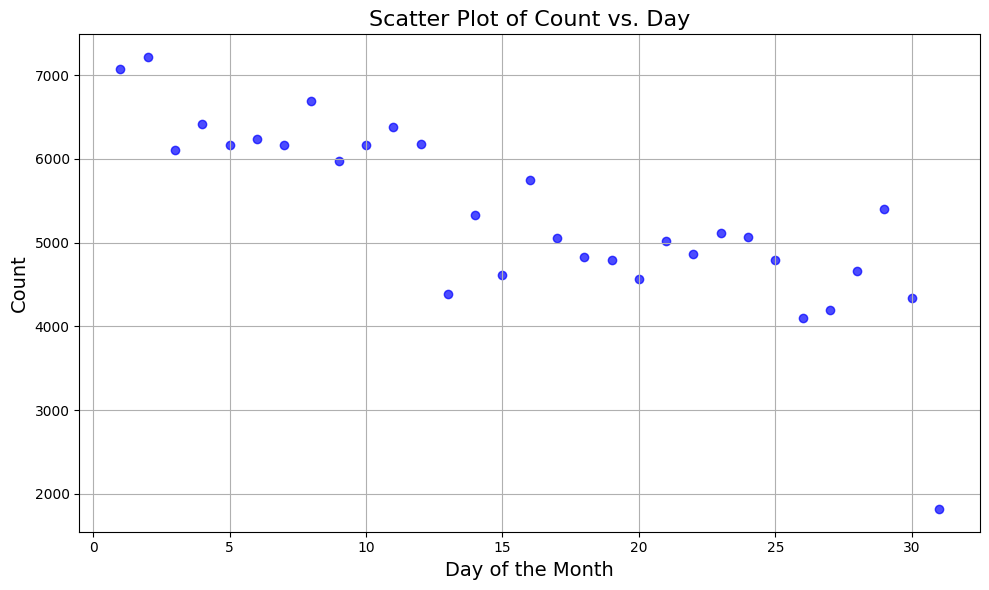

In [124]:
day_counts = e_shopping_data.groupby('Day').size()

plt.figure(figsize=(10, 6))
plt.scatter(day_counts.index, day_counts.values, color='blue', alpha=0.7)

plt.title("Scatter Plot of Count vs. Day", fontsize=16)
plt.xlabel("Day of the Month", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

#Linear regression line for day of the month and user activity

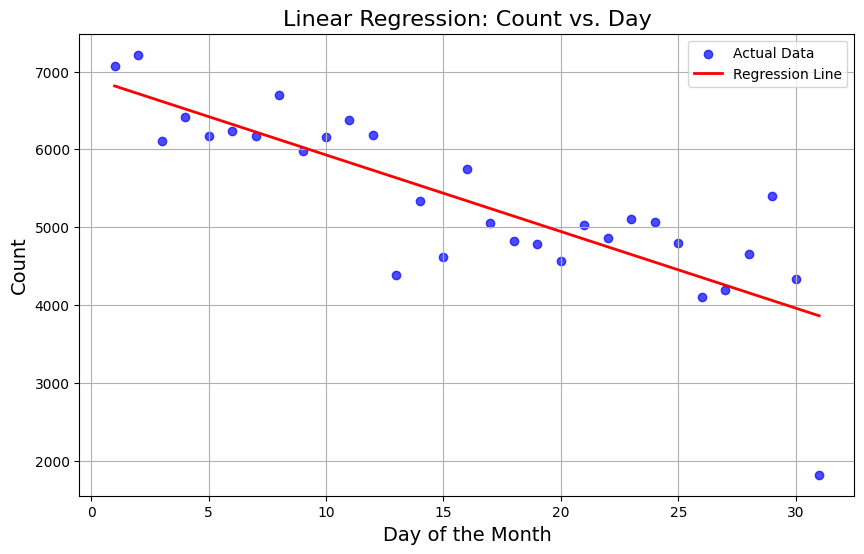

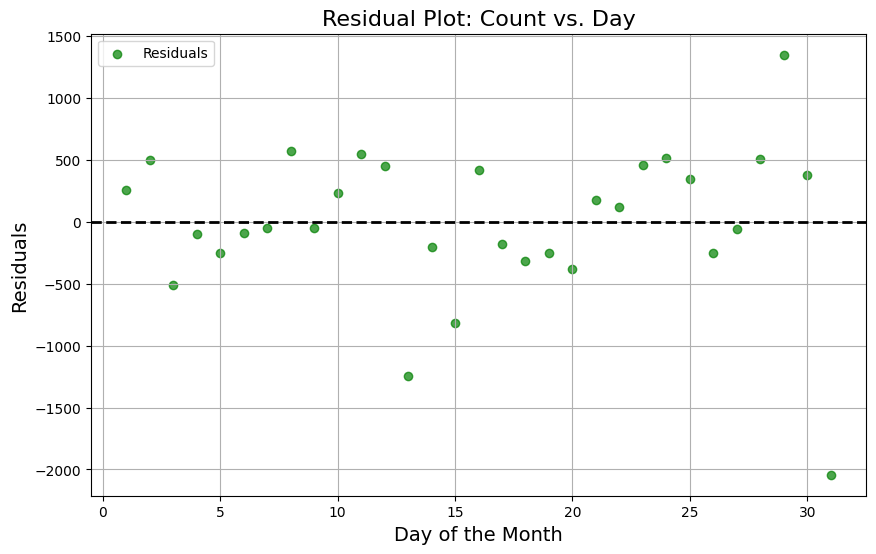

Slope (Coefficient): -98.45
Intercept: 6913.02
R-squared: 0.68
Mean Squared Error (MSE): 367993.24
Mean Absolute Error (MAE): 439.34


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

day_counts = e_shopping_data.groupby('Day').size().reset_index(name='count')

X = day_counts['Day'].values.reshape(-1, 1)
y = day_counts['count'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(day_counts['Day'], day_counts['count'], color='blue', alpha=0.7, label="Actual Data")
plt.plot(day_counts['Day'], y_pred, color='red', linewidth=2, label="Regression Line")
plt.title("Linear Regression: Count vs. Day", fontsize=16)
plt.xlabel("Day of the Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(day_counts['Day'], residuals, color='green', alpha=0.7, label="Residuals")
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title("Residual Plot: Count vs. Day", fontsize=16)
plt.xlabel("Day of the Month", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

print(f"Slope (Coefficient): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

from sklearn.metrics import mean_squared_error, mean_absolute_error

r_squared = model.score(X, y)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"R-squared: {r_squared:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


#Bar plot for types of customers based on spending capacity

In [126]:
average_price = e_shopping_data['Price'].mean()

e_shopping_data['Price Preference'] = e_shopping_data['Price'].apply(
    lambda x: 'Premium Buyer' if x > average_price else 'Budget-Conscious Shopper'
)

customer_segments = e_shopping_data.groupby('Session ID')['Price Preference'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else 'Budget-Conscious Shopper'
).reset_index()

customer_segments.columns = ['Session ID', 'Dominant Price Preference']
segmented_data = pd.merge(e_shopping_data, customer_segments, on='Session ID', how='left')

segmented_data.to_csv('segmented_e_shopping_data.csv', index=False)
customer_segments_count = segmented_data['Dominant Price Preference'].value_counts()
px.bar(customer_segments_count, title='Customer Segments Based on Spending Capacity')

#Clustering customers based on their spending capacity

In [127]:
average_price = e_shopping_data['Price'].mean()

e_shopping_data['Price Preference'] = e_shopping_data['Price'].apply(
    lambda x: 'Premium Buyer' if x > average_price else 'Budget-Conscious Shopper'
)

e_shopping_data['page_visited'] = 1  # Dummy column for counting pages
session_data = e_shopping_data.groupby('Session ID').agg({
    'Price': 'mean',                     # Average price viewed per session
    'page_visited': 'sum',              # Total number of pages visited
    'Price Preference': lambda x: x.mode()[0]  # Dominant price preference
}).reset_index()

fig1 = px.scatter(
    session_data,
    x='Price',
    y='page_visited',
    color='Price Preference',  # Color points based on price preference
    title='Average Price vs. Total Pages Visited',
    labels={'Price': 'Average Price per Session', 'page_visited': 'Total Pages Visited'},
    hover_data=['Session ID']
)
fig1.show()